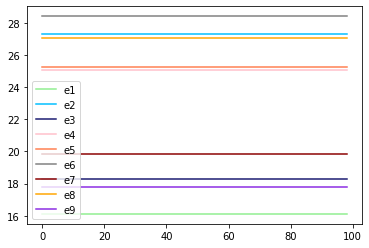

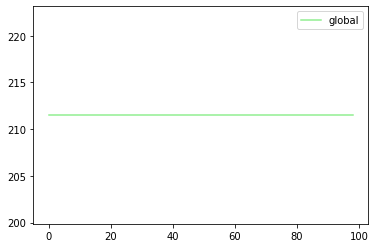

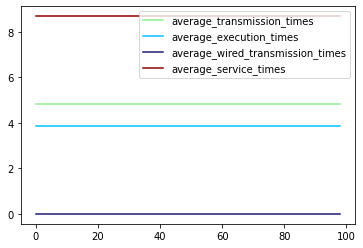

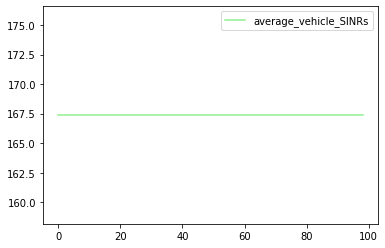

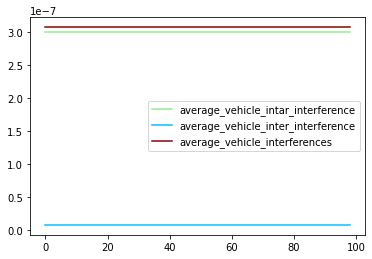

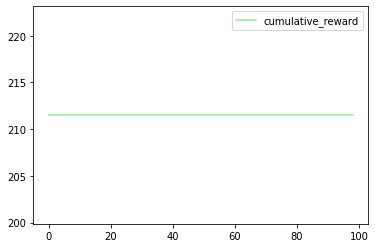

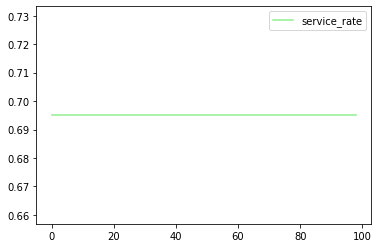

Average service rate:  0.6950786402841199
Cumulative reward:  211.50769716179911
Average edge reward:  22.785328323333335
Average service time:  8.678785020372326
Average transmission times:  4.830303181791628


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

# Local
# scenario = 1
# file_name = "/home/neardws/acme/cf8bed84-2b2c-11ed-b36c-04d9f5632a58/"
# scenario = 2
# file_name = "/home/neardws/acme/dca3bccc-2b2c-11ed-b114-04d9f5632a58/"
# scenario = 3
# file_name = "/home/neardws/acme/e58afa9e-2b2c-11ed-b71c-04d9f5632a58/"
# scenario = 4
file_name = "/home/neardws/acme/efc1b67e-2b2c-11ed-aee9-04d9f5632a58/"

# 1-10 GHz
# file_name = "/home/neardws/acme/0ec31fd6-2b2d-11ed-b3fe-04d9f5632a58/"
# 2-10 GHz
# file_name = "/home/neardws/acme/184d0094-2b2d-11ed-ab8c-04d9f5632a58/"
# 4-10 GHz
# file_name = "/home/neardws/acme/205b6c76-2b2d-11ed-8f40-04d9f5632a58/"
# 5-10 GHz
# file_name = "/home/neardws/acme/2a0f233e-2b2d-11ed-a888-04d9f5632a58/"

# different task rate
# 0.3
# file_name = "/home/neardws/acme/33956b84-2b2d-11ed-8639-04d9f5632a58/"
# 0.4
# file_name = "/home/neardws/acme/3d1cc26a-2b2d-11ed-9bfa-04d9f5632a58/"
# 0.6 
# file_name = "/home/neardws/acme/47668396-2b2d-11ed-a0ff-04d9f5632a58/"
# 0.7
# file_name = "/home/neardws/acme/524894ac-2b2d-11ed-9539-04d9f5632a58/"

start_index = 0
returns_file_name = file_name + "logs/environment_loop/logs.csv"

name=["average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference",  "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "episodes", "local_rate", "offload_rate", "service_rate", "steps", "steps_per_second"]

returns_df = pd.read_csv(returns_file_name, names=name, header=0)

episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 10))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        if process_str[index].endswith("\n"):
            s = s.replace("\n", "")
        f_s = float(s)
        returns[ret_index][index] = f_s


start_index = 0
end_index = -1
epoch_index = [i for i in range(episode_return.shape[0])]

epoch_index = epoch_index[start_index:end_index]

e1_return = returns[:, 0].tolist()
e2_return = returns[:, 1].tolist()
e3_return = returns[:, 2].tolist()
e4_return = returns[:, 3].tolist()
e5_return = returns[:, 4].tolist()
e6_return = returns[:, 5].tolist()
e7_return = returns[:, 6].tolist()
e8_return = returns[:, 7].tolist()
e9_return = returns[:, 8].tolist()
plt.plot(epoch_index, e1_return[start_index:end_index], '-', color='lightgreen', label='e1')
plt.plot(epoch_index, e2_return[start_index:end_index], '-', color='deepskyblue', label='e2')
plt.plot(epoch_index, e3_return[start_index:end_index], '-', color='midnightblue', label='e3')
plt.plot(epoch_index, e4_return[start_index:end_index], '-', color='pink', label='e4')
plt.plot(epoch_index, e5_return[start_index:end_index], '-', color='coral', label='e5')
plt.plot(epoch_index, e6_return[start_index:end_index], '-', color='gray', label='e6')
plt.plot(epoch_index, e7_return[start_index:end_index], '-', color='darkred', label='e7')
plt.plot(epoch_index, e8_return[start_index:end_index], '-', color='orange', label='e8')
plt.plot(epoch_index, e9_return[start_index:end_index], '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[start_index:end_index, 9].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()

average_transmission_times = returns_df["average_transmision_times"].values
average_execution_times = returns_df["average_execution_times"].values
average_wired_transmission_times = returns_df["average_wired_transmission_times"].values
average_service_times = returns_df["average_service_times"].values
plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_SINRs = returns_df["average_vehicle_SINRs"].values
plt.plot(epoch_index, average_vehicle_SINRs[start_index:end_index], '-', color='lightgreen', label='average_vehicle_SINRs')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_intar_interference = returns_df["average_vehicle_intar_interference"].values
average_vehicle_inter_interference = returns_df["average_vehicle_inter_interference"].values
average_vehicle_interferences = returns_df["average_vehicle_interferences"].values
plt.plot(epoch_index, average_vehicle_intar_interference[start_index:end_index], '-', color='lightgreen', label='average_vehicle_intar_interference')
plt.plot(epoch_index, average_vehicle_inter_interference[start_index:end_index], '-', color='deepskyblue', label='average_vehicle_inter_interference')
plt.plot(epoch_index, average_vehicle_interferences[start_index:end_index], '-', color='darkred', label='average_vehicle_interferences')
plt.legend(loc="best")  # 图例
plt.show()

cumulative_reward = returns_df["cumulative_reward"].values
plt.plot(epoch_index, cumulative_reward[start_index:end_index], '-', color='lightgreen', label='cumulative_reward')
plt.legend(loc="best")  # 图例
plt.show()

service_rate = returns_df["service_rate"].values
plt.plot(epoch_index, service_rate[start_index:end_index], '-', color='lightgreen', label='service_rate')
plt.legend(loc="best")  # 图例
plt.show()

maximum_cumulative_reward_index = cumulative_reward.mean()

local_rate = returns_df["local_rate"].values
edge_rate = returns_df["offload_rate"].values

print("Average service rate: ", service_rate.mean())
print("Cumulative reward: ", cumulative_reward.mean())
print("Average edge reward: ", (returns[:, 0].mean() + returns[:, 1].mean() + returns[:, 2].mean() + returns[:, 3].mean() + returns[:, 4].mean() + returns[:, 5].mean() + returns[:, 6].mean() + returns[:, 7].mean() + returns[:, 8].mean() ) / 9)
print("Average service time: ", average_service_times.mean())
print("Average transmission times: ", average_transmission_times.mean())
# print("Average execution times: ", average_execution_times.mean())
# print("Average wired transmission time: ", average_wired_transmission_times.mean())
# print("Average SINR: ", average_vehicle_SINRs.mean())
# print("Average vehicle interference: ", average_vehicle_interferences.mean())
# print("Local rate: ", local_rate.mean())
# print("Edge rate: ", edge_rate.mean())
